In [105]:
!pip install pandas matplotlib
!pip install sqlalchemy mysql-connector-python

In [106]:
import pandas as pd # primary data structure library
import numpy as np  # useful for many scientific computing in Python
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sqlalchemy import create_engine
from credentials import mysql_username, mysql_password

In [107]:
# Database connection using SQLAlchemy
database_username = mysql_username
database_password = mysql_password
database_ip       = 'localhost'
database_name     = 'creditcard_capstone'
database_connection = create_engine(f'mysql+pymysql://{database_username}:{database_password}@{database_ip}/{database_name}')


In [108]:
# 1. Percentage of applications approved for self-employed applicants
query1 = """
SELECT Application_Status, Self_Employed, COUNT(*) as count
FROM cdw_sapp_loan_application
WHERE Self_Employed = 'Yes'
GROUP BY Application_Status, Self_Employed;
"""

df1 = pd.read_sql(query1, database_connection)
print(df1)

  Application_Status Self_Employed  count
0                  Y           Yes     46
1                  N           Yes     24


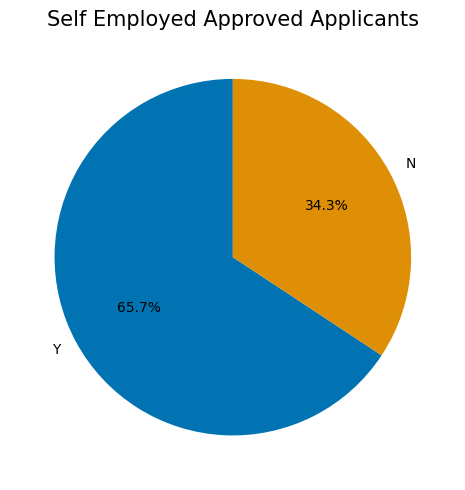

In [109]:
 # Plotting
plt.figure(figsize=(5, 5))
colors = sns.color_palette('colorblind')
plt.pie(df1['count'], labels=df1['Application_Status'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Self Employed Approved Applicants', fontsize=15)
plt.tight_layout()
plt.show()


In [110]:
# 2. Percentage of rejection for married male applicants
query2 = """
SELECT Application_Status, COUNT(*) as count
FROM cdw_sapp_loan_application
WHERE Married = 'Yes' AND Gender = 'Male'
GROUP BY Application_Status;
"""
df2 = pd.read_sql(query2, database_connection)
print(df2)

  Application_Status  count
0                  N     87
1                  Y    219


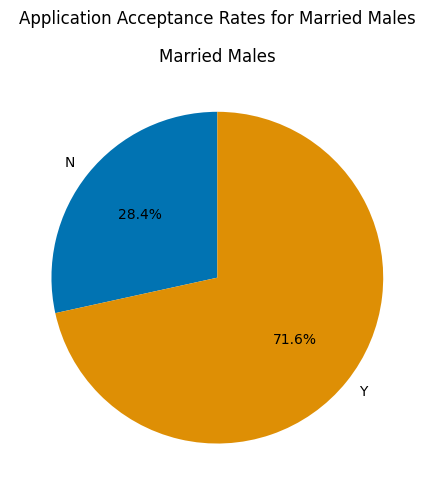

In [111]:

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle("Application Acceptance Rates for Married Males")

# Pie chart for Married Males
colors = sns.color_palette('colorblind')
ax.pie(df2.iloc[:, 1], labels=df2.iloc[:, 0], autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Married Males')

plt.tight_layout()
plt.show()



In [112]:
# 3. Top three months with the largest volume of transaction data
query3 = """
SELECT 
    SUBSTRING(TIMEID, 1, 4) AS year, 
    SUBSTRING(TIMEID, 5, 2) AS month,  
    SUM(transaction_value) AS total 
FROM cdw_sapp_credit_card 
GROUP BY year, month
ORDER BY total DESC 
LIMIT 3;
"""

df3 = pd.read_sql(query3, database_connection)
print(df3)

   year month      total
0  2018    10  202583.89
1  2018    05  201310.26
2  2018    12  201251.08


<Figure size 640x480 with 0 Axes>

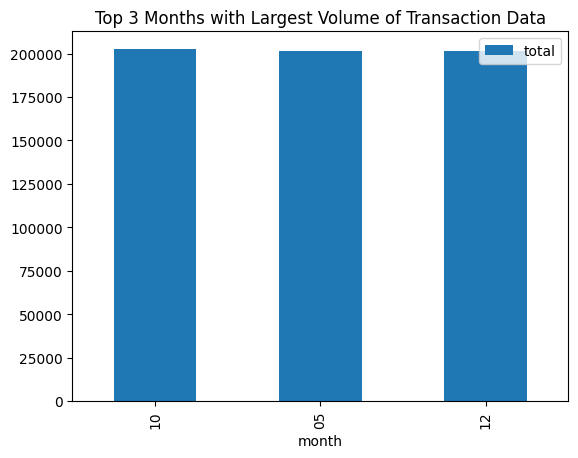

In [113]:

plt.figure()
df3.plot(x="month", y="total", kind="bar", title="Top 3 Months with Largest Volume of Transaction Data")
plt.show()


In [114]:
# 4. Branch with highest total dollar value of healthcare transactions
query4 = """
SELECT BRANCH_CODE, 
       SUM(transaction_value) AS Total_Transaction_Value
FROM cdw_sapp_credit_card 
WHERE TRANSACTION_TYPE = 'healthcare' 
GROUP BY BRANCH_CODE 
ORDER BY Total_Transaction_Value DESC 
LIMIT 1;
"""

df4 = pd.read_sql(query4, database_connection)
print(df4)

   BRANCH_CODE  Total_Transaction_Value
0           25                  4370.18


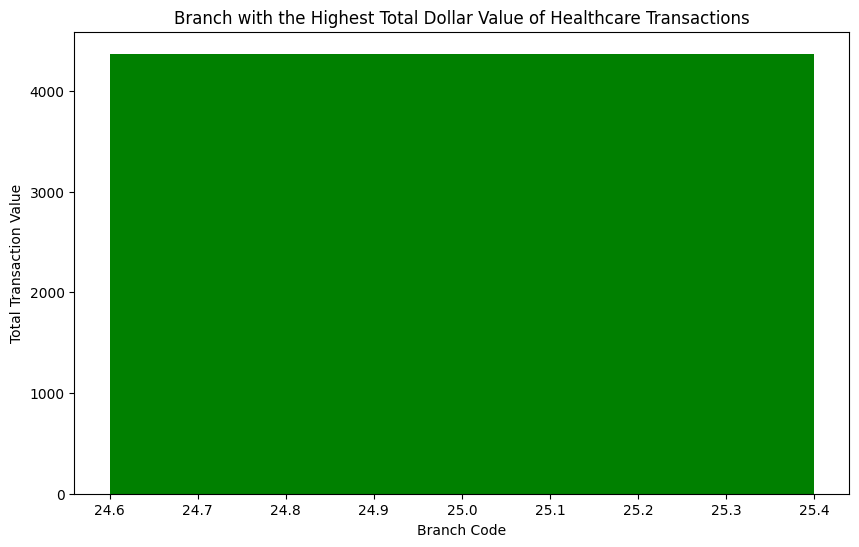

In [116]:
# Plotting the result
plt.figure(figsize=(10, 6))
plt.bar(df4["BRANCH_CODE"], df4["Total_Transaction_Value"], color='green')
plt.xlabel("Branch Code")
plt.ylabel("Total Transaction Value")
plt.title("Branch with the Highest Total Dollar Value of Healthcare Transactions")
plt.show()

In [117]:
# Fetching data for top 3 branches with highest total dollar value of healthcare transactions
query_top3 = """
SELECT BRANCH_CODE, 
       SUM(transaction_value) AS Total_Transaction_Value
FROM cdw_sapp_credit_card 
WHERE TRANSACTION_TYPE = 'healthcare' 
GROUP BY BRANCH_CODE 
ORDER BY Total_Transaction_Value DESC 
LIMIT 3;
"""

In [118]:
df_top3 = pd.read_sql(query_top3, database_connection)

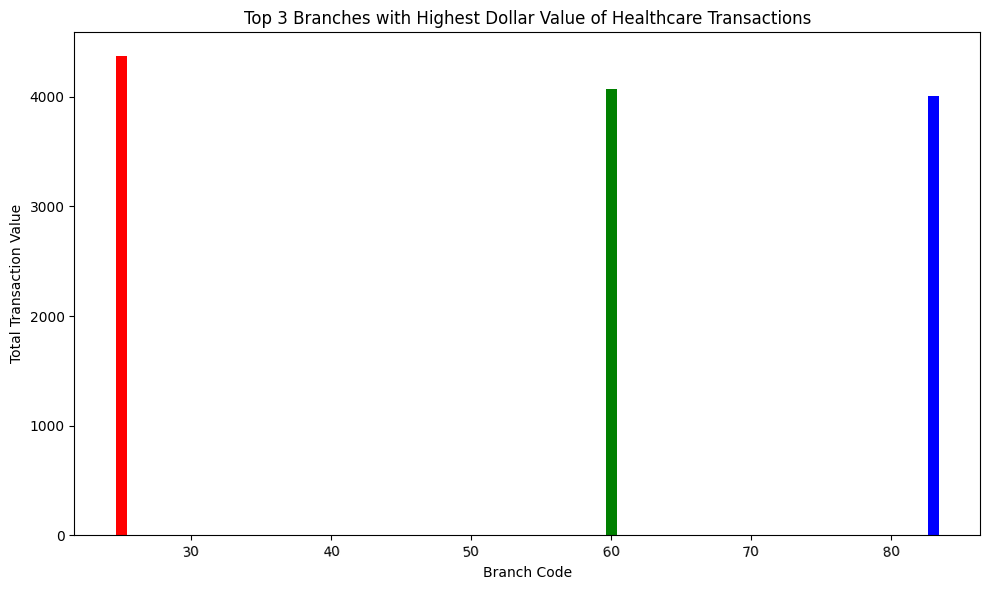

In [119]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(df_top3["BRANCH_CODE"], df_top3["Total_Transaction_Value"], color=['red', 'green', 'blue'])
plt.xlabel("Branch Code")
plt.ylabel("Total Transaction Value")
plt.title("Top 3 Branches with Highest Dollar Value of Healthcare Transactions")
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()